# Meta Algoritmos: Tunning de Hiperparámetros

Se visualizará una hiperparametrización o meta algoritmos (por arriba de los algoritmos de machine learning), en los algoritmos de machine learning anteriores había ciertos parámetros con valores por defecto y si quisiéramos podríamos modificarlos, si no se modifica nada, esos parámetros se quedan por defecto y el algoritmo empieza a realizar el mejor cálculo para tener los valores de los parámetros más cercanos a lo que queremos predecir o que la máquina quiere aprender

Esto se quiere realizar para obtener mejor precisión mediante probar distintos parámetros de los modelos que nosotros le enviemos a esos meta algoritmos y obtener una mejor precisión o los parámetros correctos, ejemplos de éstos meta algoritmos son:

- Grid Search
- Random Search
- Bayesian Optimization



In [1]:
import pandas as pd
df = pd.read_csv('./archive/Train.csv')
df.dropna(inplace= True) # Eliminar los nulos sin crear un nuevo dataframe sino solo modificando el original
df.head()


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C


# 1. Preprocesamiento

In [2]:
from sklearn.preprocessing import OrdinalEncoder
columns = ['Gender', 'Ever_Married','Graduated','Profession','Spending_Score','Var_1'] # Todas las columnas que no son números (excepto variable objetivo)
enc = OrdinalEncoder()
df_enc = enc.fit_transform(df[columns]) # Convirtiendo las columnas a números que identifiquen las categorías existentes en cada columna
# Recordemos que el resultado de fit transform es una matriz y no un dataframe
for (index, column) in enumerate(columns): # Enumerate nos deja obtener cada valor y su índice en un arreglo
    df[column] = df_enc[:, index] # Utilizamos el índice obtenido de enumerate() para acceder a los valores en la matriz df_enc y tomamos todas las filas
    
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1.0,0.0,22,0.0,5.0,1.0,2.0,4.0,3.0,D
2,466315,0.0,1.0,67,1.0,2.0,1.0,2.0,1.0,5.0,B
3,461735,1.0,1.0,67,1.0,7.0,0.0,1.0,2.0,5.0,B
5,461319,1.0,1.0,56,0.0,0.0,0.0,0.0,2.0,5.0,C
6,460156,1.0,0.0,32,1.0,5.0,1.0,2.0,3.0,5.0,C


In [3]:
from sklearn.preprocessing import LabelEncoder # Para arreglo unidimensional

le = LabelEncoder()
y = le.fit_transform(df['Segmentation']) # Entrenar y transformar el campo Segmentation

X_columns = [x for x in list(df.columns) if x not in ['ID', 'Segmentation']] # Devolver nombre de las columnas que no se llamen ID o Segmentation 
X = df[X_columns] 

print(X.shape, y.shape)

(6665, 9) (6665,)


In [4]:
# Cambiar la distribución 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X) # Recordar que al transformarlo se convierte en arreglo y no dataframe
X

array([[ 0.90145382, -1.20393817, -1.30341502, ...,  0.76189395,
         0.76011295, -0.83623949],
       [-1.10931917,  0.83060744,  1.42009199, ...,  0.76189395,
        -1.20757975,  0.58304653],
       [ 0.90145382,  0.83060744,  1.42009199, ..., -0.41140161,
        -0.55168218,  0.58304653],
       ...,
       [-1.10931917, -1.20393817, -0.63766886, ...,  0.76189395,
        -1.20757975,  0.58304653],
       [-1.10931917, -1.20393817, -1.00080313, ...,  0.76189395,
         0.76011295,  0.58304653],
       [ 0.90145382,  0.83060744, -0.39557935, ..., -1.58469717,
         0.10421538, -0.83623949]])

# Entrenar un algoritmo de machine learning

In [6]:
# Nótese que a pesar de que ya tenemos un set de entrenamiento y prueba en dos archivos excel se realizará la separación en sets de entrenamiento
# y prueba del set Train.csv

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size= 0.2, random_state = 0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(5332, 9) (1333, 9) (5332,) (1333,)


In [7]:
# Hay muchos y diferentes algoritmos de machine learning, no existe el mejor, depende de los datos y los patrones que los datos pueden 
# tener, por eso siempre es importante probar varios 

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score


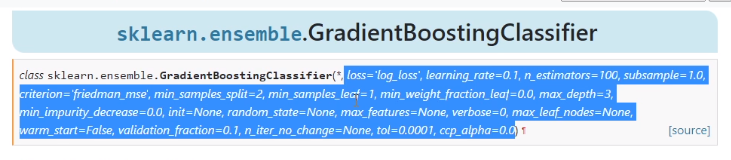

In [10]:
cls = GradientBoostingClassifier() # Vemos los valores por defecto de los parámetros

# La idea de la hiperparametrización es jugar con estos valores iniciales, que se puede hacer de forma manual, probandolos, pero esto lo 
# pueden hacer los meta algoritmos 

# Primero entrenamos el modelo con valores por defecto y vemos el score

cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.5573893473368342


# Uso de los meta algoritmos